# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [19]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
test_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q=Chicago"
test_weather = requests.get(test_url).json()
test_weather

{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 12.43,
  'feels_like': 11.63,
  'temp_min': 9.81,
  'temp_max': 13.43,
  'pressure': 1017,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 7.72, 'deg': 20, 'gust': 10.29},
 'clouds': {'all': 100},
 'dt': 1697330879,
 'sys': {'type': 2,
  'id': 2005153,
  'country': 'US',
  'sunrise': 1697284878,
  'sunset': 1697325099},
 'timezone': -18000,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [21]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | smithers
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | prado
Processing Record 9 of Set 1 | francistown
Processing Record 10 of Set 1 | gobabis
Processing Record 11 of Set 1 | sarny
Processing Record 12 of Set 1 | minas de marcona
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | st. john's
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | al ghayzah
Process

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()


City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,smithers,54.7804,-127.1743,15.18,47,75,1.54,CA,1697329724
1,port mathurin,-19.6833,63.4167,22.67,69,0,4.78,MU,1697329724
2,adamstown,-25.0660,-130.1015,21.38,78,97,2.61,PN,1697329725
3,qaqortoq,60.7167,-46.0333,3.70,68,18,1.32,GL,1697329427
4,port-aux-francais,-49.3500,70.2167,0.38,69,84,12.26,TF,1697329725


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smithers,54.7804,-127.1743,15.18,47,75,1.54,CA,1697329724
1,port mathurin,-19.6833,63.4167,22.67,69,0,4.78,MU,1697329724
2,adamstown,-25.0660,-130.1015,21.38,78,97,2.61,PN,1697329725
3,qaqortoq,60.7167,-46.0333,3.70,68,18,1.32,GL,1697329427
4,port-aux-francais,-49.3500,70.2167,0.38,69,84,12.26,TF,1697329725


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

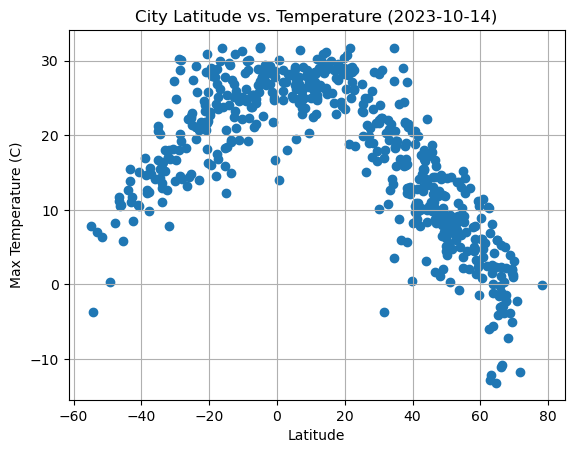

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-10-14)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

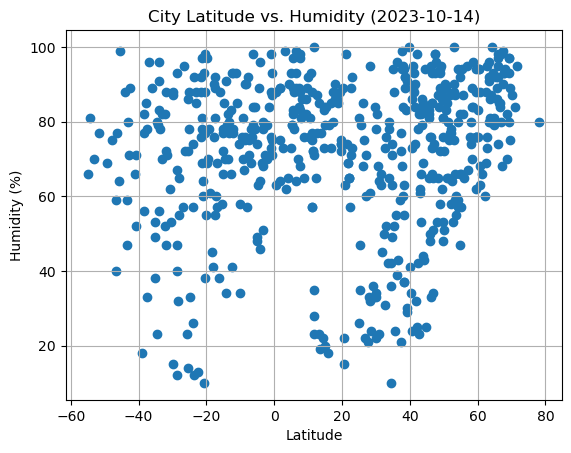

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-14)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

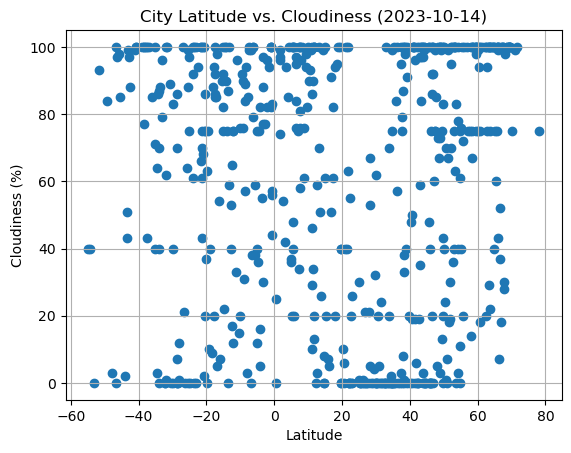

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-14)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

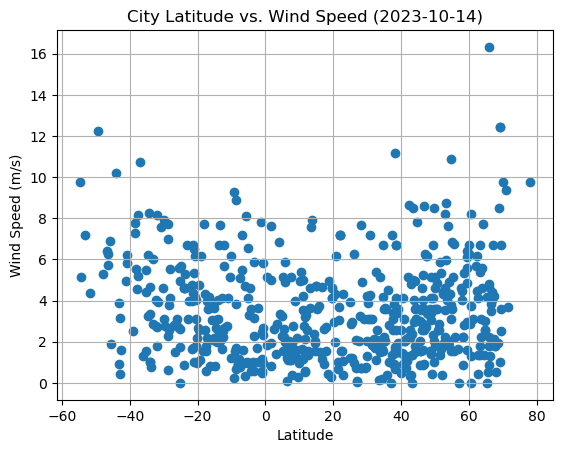

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-14)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE



In [4]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smithers,54.7804,-127.1743,15.18,47,75,1.54,CA,1697329724
3,qaqortoq,60.7167,-46.0333,3.70,68,18,1.32,GL,1697329427
5,aykhal,66.0000,111.5000,-11.07,92,43,0.89,RU,1697329725
10,sarny,51.3380,26.6019,14.42,80,67,2.84,UA,1697329429
12,yellowknife,62.4560,-114.3525,10.23,88,20,6.17,CA,1697329553


In [5]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,22.67,69,0,4.78,MU,1697329724
2,adamstown,-25.0660,-130.1015,21.38,78,97,2.61,PN,1697329725
4,port-aux-francais,-49.3500,70.2167,0.38,69,84,12.26,TF,1697329725
6,puerto natales,-51.7236,-72.4875,6.32,77,93,4.39,CL,1697329725
7,prado,-17.3411,-39.2208,23.57,92,92,2.19,BR,1697329726


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7682045801256087


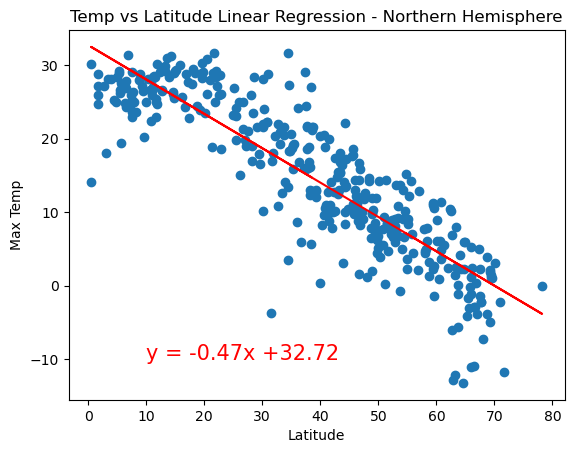

In [13]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Temp vs Latitude Linear Regression - Northern Hemisphere")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

The r-value is: 0.5913235673386731


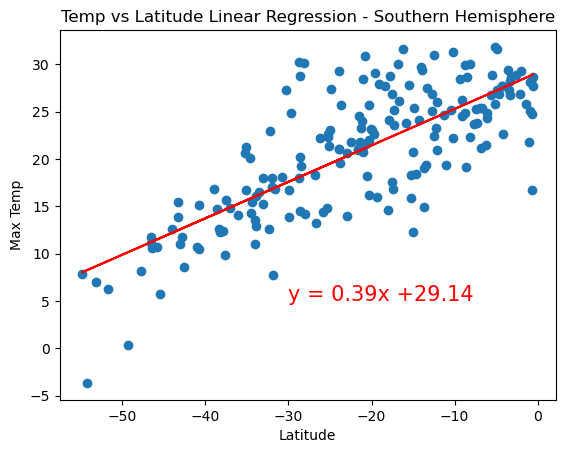

In [15]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Temp vs Latitude Linear Regression - Southern Hemisphere")
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

**Discussion about the linear relationship:** 
This is a decent model. Temperatures increase the closer a city is to the equator (latitude 0).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.026649054322564765


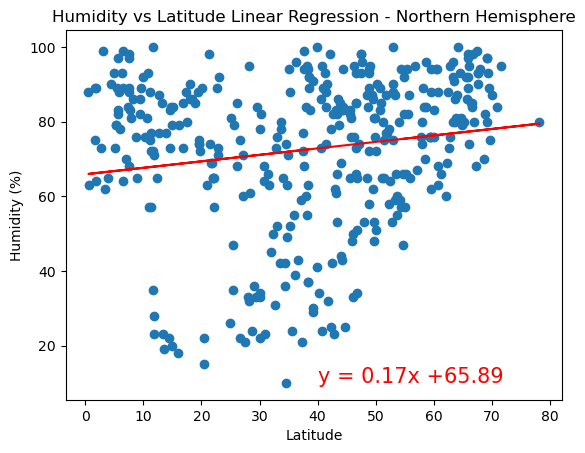

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity vs Latitude Linear Regression - Northern Hemisphere")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

The r-value is: 0.0229386253583943


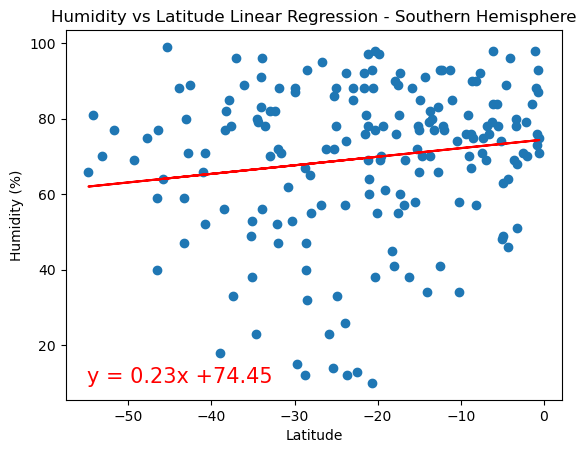

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Humidity vs Latitude Linear Regression - Southern Hemisphere")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

**Discussion about the linear relationship:** Latitude is not useful for predicting humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.034911568769126426


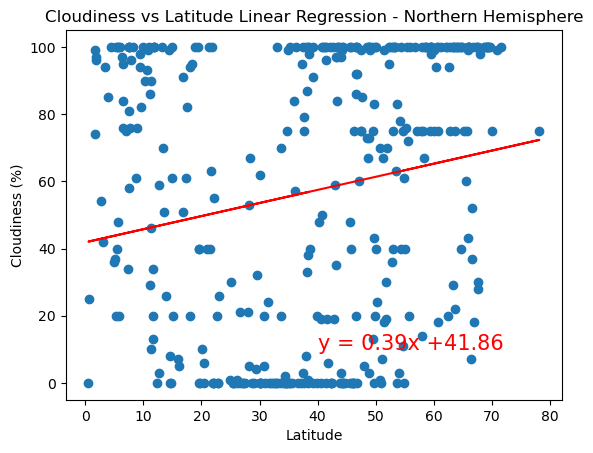

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness vs Latitude Linear Regression - Northern Hemisphere")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

The r-value is: 0.002047410688096892


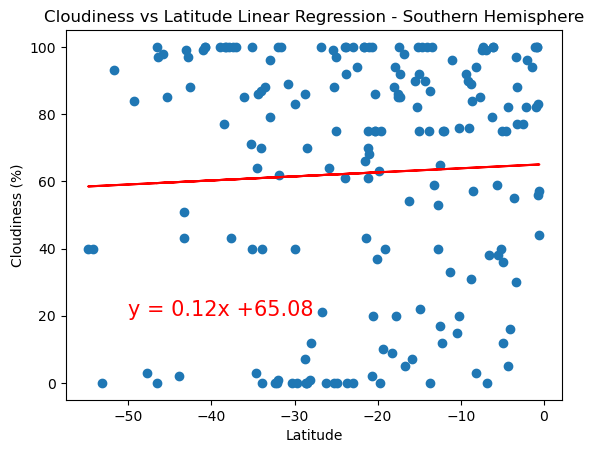

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Cloudiness vs Latitude Linear Regression - Southern Hemisphere")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

**Discussion about the linear relationship:** Latitude is not useful for predicting cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04972885016807091


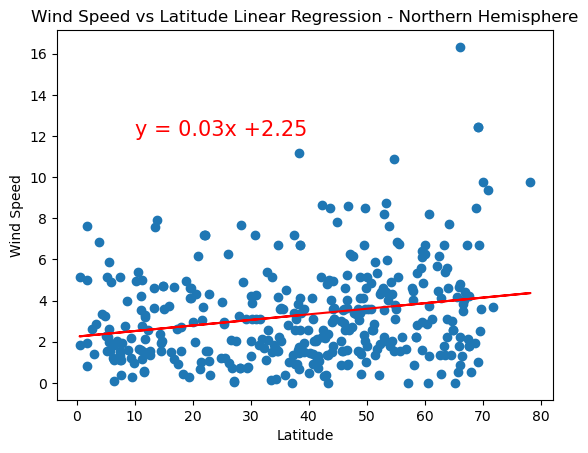

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs Latitude Linear Regression - Northern Hemisphere")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

The r-value is: 0.11398311574990622


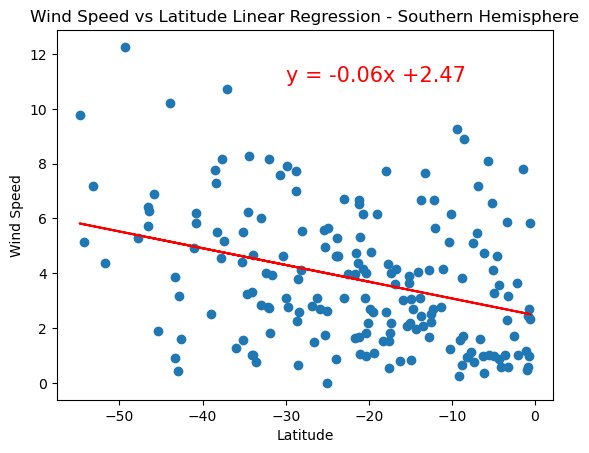

In [30]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Wind Speed vs Latitude Linear Regression - Southern Hemisphere")
plt.annotate(line_eq,(-30,11),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue**2}")
# Show plot
plt.show()

**Discussion about the linear relationship:** Latitude is not useful for predicting wind speeds.